# Fundamentals of Statistics

<a href="https://colab.research.google.com/github/chattopadhyayA/ml_pursue2025/blob/master/content/01_stat.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Before starting with the details of machine learning, let us first recap some fundamental concepts of statistics. This are the terms that you will use a lot if you stick with the business of machine learning. Machine learning is science as well as it is a form or painting, where statistics and mathematics are like the paint and stroke. 

## <span style="color:maroon"> Probability distribution function </span>

Let us first jump into the definitions of a probability distribution functions (PDF). They come in two flavours **discrete** and **continuous**. To be *worthy* of being a probability distribution both of them have obey some properties. 


> ### <span style="color:blue"> Discrete probability distribution </span>
>
> The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible outcomes. It is also sometimes called the probability mass function. Suppose a random variable $X$ may take $k$ different values, with the probability that $X = x_{i}$ defined to be $P(X = x_{i}) = p_{i}$. Then the probabilities $p_{i}$ must satisfy the following:
>
> 1: 0 < $p_{i}$ < 1 for each $i$
>
> 2: $p_{1} + p_{2} + ... + p_{k} = 1$.


#### Binomial distribution

This is the distribution where only two outcomes are possible, *success* and *failure* with probabilities $p$ and $1-p$. Then the probability of $k$ successes in $n$ trials is

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} ; \quad \text{where } \binom{n}{k}=\frac{n!} {(n-k)!}
$$




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom
import ipywidgets as widgets
from IPython.display import display

def plot_binomial(n, p, k_highlight):
    k = np.arange(0, n + 1)  # Possible number of successes
    probs = binom.pmf(k, n, p)  # PMF values

    plt.figure(figsize=(10, 6))
    markerline, stemlines, baseline = plt.stem(k, probs)
    plt.setp(markerline, color='b', label="PMF")
    plt.setp(stemlines, color='b')

    # Highlight one point in red
    if 0 <= k_highlight <= n:
        plt.plot(k_highlight, binom.pmf(k_highlight, n, p), 'ro', label=f"P(X={k_highlight})")

    plt.title(f"Binomial Distribution PMF (n={n}, p={p})")
    plt.xlabel("Number of Successes (k)")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.show()

widgets.interact(
    plot_binomial,
    n=widgets.IntSlider(value=10, min=1, max=50, step=1, description='Trials (n)'),
    p=widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='Success Prob (p)'),
    k_highlight=widgets.IntSlider(value=5, min=0, max=50, step=1, description='k Highlight')
    )

interactive(children=(IntSlider(value=10, description='Trials (n)', max=50, min=1), FloatSlider(value=0.5, des…

<function __main__.plot_binomial(n, p, k_highlight)>

### ❓ Exercise 
**Q1:** For a binomial distribution with $n = 30$, and success probability of $p=0.5$, what is the probability of getting $10$ successes? 
<details>
<summary>Click to show answer</summary>

Answer: The result is $0.02798$. You can check this by using the function *binom.pmf(10, 30, 0.5)*.

</details>

### ❓ Exercise
**Q2:** When is the binomial distribution most symmetric?
<details>
<summary>Click to show answer</summary>

Answer: A binomial distribution is most symmetric when $p = 0.5$.

</details>

> ### <span style="color:blue"> Continuous probability distribution </span>
>
> As the name suggests in this case the outcomes can take any continuos value. In this case one can only talk about outcomes between some number to another. For example, in this case it is fare to ask the question what is probability of some random outcome $x$, to be in the range $(a,b)$. The curve, which represents a function $p(x)$, must satisfy the following:
>
> 1: The curve has no negative values ($p(x) > 0$ for all values of $x$).
>
> 2: The total area under the curve is equal to $1$.


#### Gaussian Distribution

The Gaussian or normal distribution, is something you will find everywhere in Data science. Sometimes this is one of the assumptions for many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean $μ$ and standard deviation $σ$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean $μ$ and standard deviation $σ$ at a given point $x$ is given by:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

For more mathematically oriented people, you can plug into this distribution and confirm

- $\int xf(x) dx=\mu$
- $\int (x-\mu)^2 f(x) dx =\sigma^2$



In [ ]:
def plot_normal(mu, sigma):
    x = np.linspace(mu - 8*sigma, mu + 8*sigma, 1000)
    y = norm.pdf(x, mu, sigma)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.xlim(-20, 20) 
    #plt.ylim(0, 20)
    plt.title("Gaussian Distribution")
    plt.grid(True)
    plt.show()

widgets.interact(plot_normal, mu=(-5, 5, 0.5), sigma=(0.1, 5.0, 0.1))

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value…

<function __main__.plot_normal(mu, sigma)>

### Likelihood vs Probability

- **Probability**: Given parameters, what's the chance of observing the data?
- **Likelihood**: Given data, how likely are the parameters?

**Example:**
- Probability: "Given \(p=0.7\), what’s the probability of 3 heads in 5 tosses?"
- Likelihood: "Given 3 heads in 5 tosses, what is the most likely value of \(p\)?"

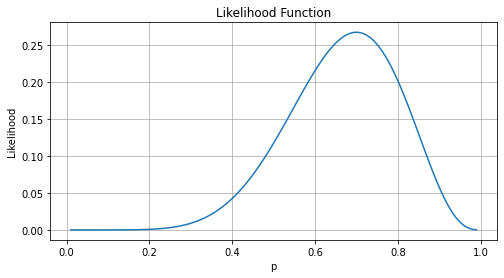

In [11]:
# Likelihood visualization
obs_heads = 7
total_flips = 10
p_vals = np.linspace(0.01, 0.99, 100)
likelihoods = binom.pmf(obs_heads, total_flips, p_vals)

plt.figure(figsize=(8, 4))
plt.plot(p_vals, likelihoods)
plt.title("Likelihood Function")
plt.xlabel("p")
plt.ylabel("Likelihood")
plt.grid(True)
plt.show()

### ❓ Exercise
**Q3:** Given $8$ heads out of $10$ tosses, sketch or estimate the maximum likelihood estimate (MLE) for $p$.
<details>
<summary>Click to show answer</summary>

Answer: The MLE for $p$ is $\frac{8}{10} = 0.8$. This is just basically the probability of having $8$ heads out of $10$ tosses. From the plot above the mode (the value that appears most frequently, in this case the peak of the curve) of the plot is the probability.

</details>

## <span style="color:maroon"> Histograms and Distribution Approximation </span>

A histogram approximates the probability distribution of data. With more samples, it resembles the true distribution.

**Key Concepts:**
- Histogram shape depends on sample size and bin width.
- More data yields smoother distribution.
- For HEP most of the time we will be looking at histograms or observed results from the detector. **The target of ML in this case is basically to find a function to fit this emperical distribution.**

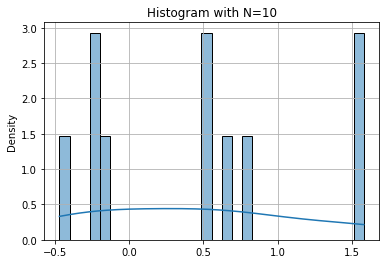

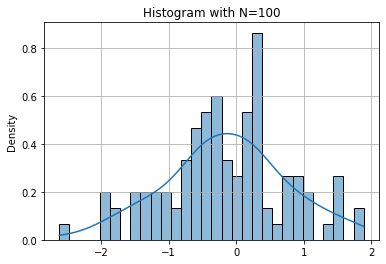

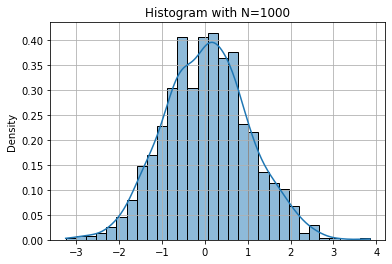

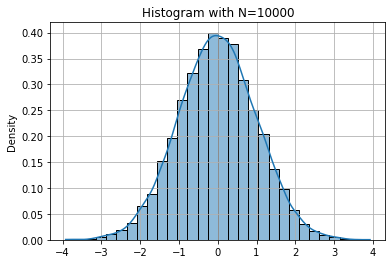

In [15]:
np.random.seed(42)
for N in [10, 100, 1000, 10000]:
    data = np.random.normal(0, 1, N)
    sns.histplot(data, kde=True, stat="density", bins=30) 

    # A kernel density estimate (KDE) plot is a method for visualizing the distribution 
    # of observations in a dataset, analogous to a histogram. KDE represents the data 
    # using a continuous probability density curve in one or more dimensions.

    plt.title(f"Histogram with N={N}")
    plt.grid(True)
    plt.show()

### ❓ Exercise
**Q4:** Why does the histogram with $N=10$ look so different from $N=10000$?
<details>
<summary>Click to show answer</summary>

Answer: With $N=10$, there are too few samples to capture the underlying distribution, resulting in high variance and noise.

</details>

## <span style="color:maroon"> Surprise, entropy and gini index </span>

### Surprise (Self-Information)

Surprise is the measurement of how "unexpected" an event is. Therefore, the more probable the event is, the less surprising it should be. Mathematically for a event with probability $p$ it could have been $\frac{1}{p}$, but to allow "zero" surprise for certain event, the surprise (or self-information) is defined as  

$$
I(p)= -\log_2(p)
$$

### Shanon entropy 

- Entropy is the **average surprise** across all possible outcomes.
- For a random variable $X$ with outcomes $x_i$ and probabilities $p_i$, Shanon entropy is defined as
$$
S(X)=-\sum_i p_i\log_2(pi)
$$
- Higher entropy --> more uncertainty; lower entropy --> less uncertainty

### Gini index

- Taking $\log$ is computationally more taxing and therefore most of the times we use different other functions or formulas to quantify same thing as entropy.

- To measure the **impurity** of a dataset, we use Gini index as 
$$
Gini(D)=1-\sum_{i=1}^C p_i^2
$$
- Where, $C$ is the number of unique classes in the dataset. $p_i$ is the proportion of data sample belonging to class $i$ in the Dataset $D$.

### ❓ Exercise
**Q5:** If all samples belong to same class, then what is the Gini index?
<details>
<summary>Click to show answer</summary>

Answer: It should be $1-1=0$

</details>

In [7]:
import math 

def calculate_surprise(probability):
    """Calculates the surprise (negative log probability) for a given event."""
    if probability == 0:
        return float('inf')  # Handle the case where probability is zero to avoid log(0) error
    return -math.log2(probability)

def calculate_gini(probabilities):
    """Calculates the Gini index of a probability distribution."""
    gini = 1
    for probability in probabilities:
        gini -= probability**2
    return gini

def calculate_entropy(probabilities):
    """Calculates the entropy of a probability distribution."""
    entropy = 0
    for probability in probabilities:
        if probability > 0:  # Handle the case where probability is zero to avoid log(0) error
            entropy -= probability * math.log2(probability)
    return entropy

def visualize_surprise_and_entropy(probabilities, title="Surprise and Entropy"):
    """Visualizes surprise and entropy for different probability distributions."""
    n_colors = len(probabilities)
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'black']  # Add more colors if needed
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    
    # Plot Surprise
    plt.title("Surprise (Negative Log Probability)")
    plt.bar(range(n_colors), [calculate_surprise(p) for p in probabilities], color=colors[:n_colors])
    plt.xlabel("Color (Event)")
    plt.ylabel("Surprise")
    
    # Plot Entropy
    plt.subplot(1, 2, 2)
    plt.title("Entropy")
    plt.pie(probabilities, labels=[f"Color {i+1}" for i in range(n_colors)], autopct='%1.1f%%', startangle=140)
    plt.ylabel("Entropy")
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

The entropy in this case:  2.32
The Gini index:  0.80


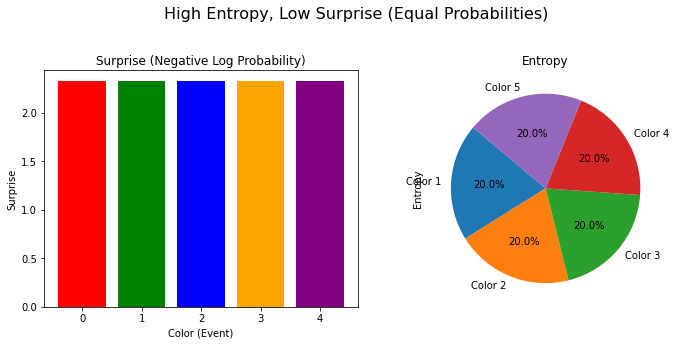

In [8]:
probabilities_1 = [0.2, 0.2, 0.2, 0.2, 0.2]
print("The entropy in this case: % .2f" % calculate_entropy(probabilities_1))
print("The Gini index: % .2f" % calculate_gini(probabilities_1))
visualize_surprise_and_entropy(probabilities_1, title="High Entropy, Low Surprise (Equal Probabilities)")
    

The entropy in this case:  1.46
The Gini index:  0.48


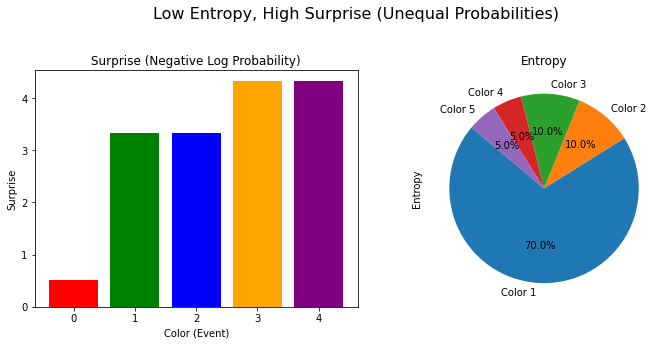

In [9]:
# Example 2: Unequal probabilities (lower entropy, higher surprise for rarer events)
probabilities_2 = [0.7, 0.1, 0.1, 0.05, 0.05]
print("The entropy in this case: % .2f" % calculate_entropy(probabilities_2))
print("The Gini index: % .2f" % calculate_gini(probabilities_2))
visualize_surprise_and_entropy(probabilities_2, title="Low Entropy, High Surprise (Unequal Probabilities)")

The entropy in this case:  0.09
The Gini index:  0.02


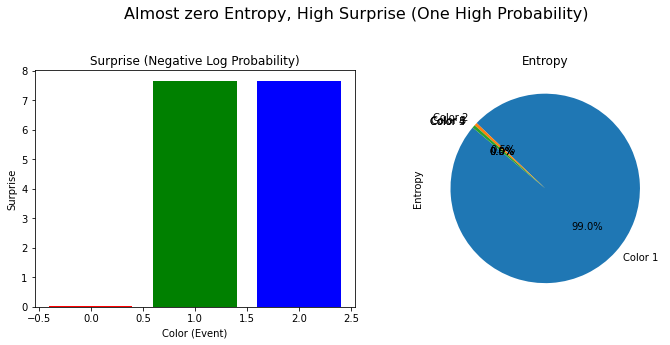

In [10]:
# Example 3: One event with high probability, others with zero (zero entropy, infinite surprise for zero probability events)
probabilities_3 = [0.99, 0.005, 0.005, 0, 0]
print("The entropy in this case: % .2f" % calculate_entropy(probabilities_3))
print("The Gini index: % .2f" % calculate_gini(probabilities_3))
visualize_surprise_and_entropy(probabilities_3, title="Almost zero Entropy, High Surprise (One High Probability)")

### ❓ Exercise
**Q6:** For different situations that you can think of, do a quantitative analysis of Gini index vs Shanon entropy.